In [10]:
# Initialisation(s)
# ! pip install cpmpy
import os, sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    # Running in Google CoLab
    from google.colab import drive
    drive.mount('/content/gdrive/')
    global_prefix = '/content/gdrive/MyDrive/Colab Notebooks/Jupyter-Puzzles/python/programmationContraintes/cpmpy/explications/mosaic/'
    os.chdir(global_prefix)
else:
    # Not running in Google CoLab
    global_prefix = os.getcwd().replace('\\','/') + '/'

sys.path.append(f'{global_prefix}../../../../outils')
import displayImages

%run ../explications.ipynb

# [Mosaïque](https://www.janko.at/Raetsel/Mosaik/index.htm) et [Démineur](https://www.janko.at/Raetsel/Minesweeper/)

#### Mosaïque 
Soit un tableau de $n\times m$ cases. Chaque case est blanche ou noire et il s'agit de déterminer les emplacements des cases noires.  
Pour cela, on dispose d'un autre tableau $n\times m$. Une case de ce tableau est vide ou contient un entier $p\geqslant0$. Dans ce dernier cas,
$p$  désigne le nombre de cases noires situées parmi les $\leqslant9$ cases voisines, étant entendu que la case contenant $p$ elle même peut être noire, auquel cas elle est comptée dans $p$.

On suppose qu'il y a une unique solution (comme pour le Sudoku).

#### Démineur
Il s'agit d'une mosaïque pour laquelle les cases contenant un entier sont blanches. Dans ce cas, les cases noires sont considérées comme contenant une mine.

## Génération des explications
### Modélisation

In [11]:
def voisins(given, p):

    i, j = p
    nrow = len(given)
    ncol = len(given[0])

    return [(i+a,j+b) for a in [-1,0,1] for b in [-1,0,1]
            if 0 <= i+a < nrow and 0 <= j+b < ncol]


def model_mosaic(given, minesweeper = False):
    """
    retourne un triplet vars, facts, constraints
    utilisable dans EXPLANATION
    """
    # cellule indéterminée
    x = -1
    # Dimensions of the problem
    nrow = len(given)
    ncol = len(given[0])

    # Model Variables
    pixels = intvar(0,1,shape = (nrow, ncol), name = "pixels")

    # contraintes
    facts = []
    constraints = []
    for i in range(nrow):
        for j in range(ncol):
            if given[i,j] != x:
                if minesweeper:
                    facts.append(pixels[i,j] == 0)
                constraints.append(sum([pixels[k,l] for k,l in voisins(given, (i, j))]) == given[i,j])

    return pixels, facts, constraints

### Exemples de mosaïques

In [12]:
x = -1

given5 = np.array([
    [x,4,x,x,x],
    [x,x,6,x,2],
    [x,7,x,x,0],
    [x,7,6,3,x],
    [3,x,5,x,x]
    ])

explanation5 = EXPLANATION(*model_mosaic(given5))

given7 = np.array([
    [0,x,4,x,3,1,1],
    [x,4,x,7,5,x,x],
    [1,4,6,x,x,6,x],
    [1,x,x,x,x,x,x],
    [2,x,x,x,3,5,x],
    [x,3,2,x,x,x,4],
    [x,x,2,1,x,3,2]
    ])

explanation7 = EXPLANATION(*model_mosaic(given7))

given10 = np.array([          
    [1,1,2,x,x,x,x,3,2,x],
    [x,x,x,2,4,5,x,5,x,2],
    [3,4,4,2,3,4,x,6,x,3],
    [x,4,x,5,4,x,x,5,4,3],
    [x,2,4,4,x,x,x,x,4,x],
    [1,x,3,3,3,x,2,1,4,3],
    [3,3,x,x,4,x,5,x,x,x],
    [5,x,4,3,x,5,x,x,5,3],
    [x,6,x,x,7,7,7,5,4,x],
    [x,x,x,2,x,x,x,x,3,x]
    ])

explanation10 = EXPLANATION(*model_mosaic(given10))

given15 = np.array([
    [x,2,x,1,x,3,3,x,x,x,x,x,x,4,3],
    [x,x,0,x,3,4,x,4,x,x,5,x,7,x,3],
    [x,x,1,4,5,x,5,x,3,2,x,6,5,x,1],
    [2,2,2,5,x,5,5,4,x,x,x,x,x,x,x],
    [4,5,x,x,x,4,5,5,x,x,x,6,x,5,x],
    [x,7,x,x,x,4,x,3,3,x,x,5,x,5,4],
    [x,7,6,x,x,3,2,x,4,x,x,4,4,x,2],
    [x,x,x,x,x,x,2,2,4,4,x,x,1,3,x],
    [3,5,6,x,x,x,x,x,6,x,x,5,3,x,2],
    [2,x,5,5,4,x,x,x,x,x,6,x,x,6,x],
    [3,5,4,2,3,x,x,4,5,8,7,x,x,6,x],
    [3,x,3,x,x,x,3,x,5,x,x,x,6,6,3],
    [x,6,4,4,3,4,x,x,6,5,x,x,x,4,2],
    [3,x,x,7,4,x,4,x,x,x,4,x,x,x,x],
    [x,x,4,x,x,x,x,x,5,4,2,x,3,3,x]
    ])

explanation15 = EXPLANATION(*model_mosaic(given15))

given20 = np.array([
    [x,x,x,x,x,x,x,3,x,1,2,2,x,x,2,3,x,x,3,x,],
    [1,x,x,4,3,5,x,6,x,2,x,2,x,x,x,x,5,5,4,1,],
    [x,x,x,7,x,x,x,7,x,5,x,x,3,3,1,3,x,x,3,x,],
    [4,5,6,6,x,x,6,x,5,x,x,x,x,3,3,x,3,3,x,3,],
    [x,x,x,x,5,7,x,6,x,x,x,x,5,6,6,4,x,3,6,x,],
    [6,6,3,2,4,x,6,5,4,x,x,5,x,x,x,x,x,4,7,x,],
    [x,4,2,x,x,x,7,x,x,x,x,x,5,x,5,3,x,6,7,4,],
    [x,2,2,x,x,4,7,x,x,5,x,x,3,x,x,x,x,5,x,3,],
    [x,3,3,x,x,5,6,x,6,6,6,x,x,5,x,x,x,5,x,x,],
    [x,x,x,4,3,5,x,x,6,x,7,4,2,x,4,5,2,x,x,3,],
    [4,x,6,x,5,6,x,x,x,x,7,4,4,x,x,x,2,x,3,x,],
    [x,6,x,x,6,x,x,x,x,4,5,x,3,x,x,6,x,4,x,x,],
    [5,x,9,9,x,x,x,x,6,x,x,4,6,5,x,5,x,3,x,x,],
    [x,6,6,7,x,x,x,8,x,x,4,x,x,7,7,x,5,5,5,5,],
    [3,x,6,x,x,x,8,9,7,x,5,x,x,x,4,x,x,x,5,x,],
    [1,x,x,x,4,x,x,8,6,5,4,7,x,x,4,x,x,x,x,5,],
    [x,x,x,x,4,x,x,8,7,5,4,6,x,4,x,4,5,x,6,x,],
    [2,2,1,2,2,3,x,6,6,4,x,5,x,x,x,3,x,5,7,5,],
    [x,x,2,x,x,2,3,5,5,x,x,4,4,x,x,4,x,6,8,x,],
    [2,2,x,x,0,1,x,x,x,x,x,x,x,x,x,x,x,3,5,4,],
    ])

explanation20 = EXPLANATION(*model_mosaic(given20))


### Exemples de démineurs

In [13]:
givenD6 = np.array([
    [ x, x, x, x, x, x],
    [ x, 2, 2, 2, 2, x],
    [ x, 2, 0, 0, 2, x],
    [ x, 2, 0, 0, 2, x],
    [ x, 2, 2, 2, 2, x],
    [ x, x, x, x, x, x]
    ])

explanationD6 = EXPLANATION(*model_mosaic(givenD6, minesweeper=True))

givenD8 = np.array([
    [0,x,x,1,x,1,x,x],
    [x,x,x,2,3,x,1,x],
    [x,1,x,x,x,x,x,x],
    [x,x,1,1,x,x,2,x],
    [1,x,x,x,x,1,x,x],
    [x,x,3,x,1,x,x,2],
    [x,2,x,x,x,x,x,1],
    [0,x,1,x,x,2,x,x]
])

explanationD8 = EXPLANATION(*model_mosaic(givenD8, minesweeper=True))

givenD9 = np.array([
    [2,x,x,x,2,x,x,x,2],
    [x,4,x,4,x,3,x,4,x],
    [x,x,4,x,x,x,1,x,x],
    [x,4,x,3,x,3,x,4,x],
    [2,x,x,x,x,x,x,x,2],
    [x,5,x,4,x,5,x,4,x],
    [x,x,3,x,x,x,3,x,x],
    [x,4,x,3,x,5,x,6,x],
    [2,x,x,x,1,x,x,x,2]
])

explanationD9 = EXPLANATION(*model_mosaic(givenD9, minesweeper=True))

givenD10 = np.array([
    [x,x,x,x,x,x,x,x,x,x],
    [x,3,2,x,3,3,3,2,2,x],
    [x,2,x,3,x,x,x,x,2,x],
    [x,2,x,x,1,1,x,3,x,x],
    [x,3,x,3,x,x,1,x,3,x],
    [x,3,x,3,x,x,1,x,3,x],
    [x,x,2,x,1,1,x,x,3,x],
    [x,3,x,x,x,x,2,x,2,x],
    [x,3,2,3,3,3,x,2,2,x],
    [x,x,x,x,x,x,x,x,x,x]
])

explanationD10 = EXPLANATION(*model_mosaic(givenD10, minesweeper=True))

givenD15 = np.array([
    [1,x,x,x,x,x,x,1,x,x,x,x,x,x,1],
    [x,x,1,1,1,1,1,x,2,2,2,2,2,x,x],
    [x,2,2,x,x,x,x,x,x,x,x,x,2,4,x],
    [x,2,x,x,2,2,2,2,2,2,2,2,x,4,x],
    [x,2,x,3,x,x,x,x,x,x,x,3,x,4,x],
    [x,2,x,3,x,3,3,3,3,3,x,3,x,4,x],
    [x,2,x,3,x,3,x,x,x,3,x,3,x,4,x],
    [2,x,x,3,x,3,x,5,x,3,x,3,x,x,2],
    [x,3,x,3,x,3,x,x,x,3,x,3,x,3,x],
    [x,3,x,3,x,3,3,3,3,3,x,3,x,3,x],
    [x,3,x,3,x,x,x,x,x,x,x,3,x,3,x],
    [x,3,x,3,4,4,4,4,4,4,4,x,x,3,x],
    [x,3,3,x,x,x,x,x,x,x,x,x,3,3,x],
    [x,x,3,3,3,3,3,x,3,3,3,3,3,x,x],
    [1,x,x,x,x,x,x,1,x,x,x,x,x,x,2]
])

explanationD15 = EXPLANATION(*model_mosaic(givenD15, minesweeper=True))

### Solution

In [14]:
explanation5.solve().tolist()

[[0, 1, 1, 1, 1],
 [0, 1, 1, 0, 0],
 [1, 1, 0, 0, 0],
 [1, 1, 1, 0, 0],
 [0, 1, 1, 1, 0]]

In [15]:
explanationD6.solve().tolist()

[[0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 1, 1, 0, 0]]

### Génération de la liste des explications pour la résolution complète

In [16]:
x = -1 # inconnu

def pixelOfConstraint(given, c):
    nrow = len(given)
    ncol = len(given[0])
    cells = extractConstraint(c.args[0])
    imin = min([cell[0] for cell in cells])
    imax = max([cell[0] for cell in cells])
    jmin = min([cell[1] for cell in cells])
    jmax = max([cell[1] for cell in cells])
    i = imin + 1 if imax - imin == 2 else 0 if imin == 0 else nrow - 1
    j = jmin + 1 if jmax - jmin == 2 else 0 if jmin == 0 else ncol - 1
    return i, j
    
def init_grid(given):

    return np.full(given.shape, x)

# amélioration de explanation.explainFull()
def explainFull(given, explanation, verbose = True): 

    if explanation.explanations is None:

        minesweeper = explanation.facts != []

        nrow = len(given)
        ncol = len(given[0])
        count = nrow * ncol

        vT = dict()
        vN = dict()
        vB = dict()
        
        # pile des cases dont les valeurs des voisins blancs (resp. noirs)
        # sont connues, ce qui permet d'en déduire que les autres voisins sont noirs (resp. blancs)
        pile = []
        empiles = []

        def pileAppend(p):
            if p not in empiles:
                pile.append(p)
                empiles.append(p)

        grid = init_grid(given)
        expls = []

        def printExplanation(E,S,N):
            print('\nFacts (E)')
            for e in E: print(f'   {e}')
            print('\nConstraints (S)')
            for c in S: print(f'   {c}')
            print('\n=> Hint (N)')
            for n in N: print(f'   {n}')
            print(f'\nRESTE {count}')

        def updateCounts(p, value):
 
            nonlocal count
 
            i, j = p
            grid[i,j] = value
            for k, l in voisins(given, p):
                if given[k, l] != x:
                    (vN if value else vB)[(k, l)] += 1
                    if value:
                        if given[k, l] == vN[(k, l)]:
                            pileAppend((k, l))
                    else:
                        if given[k, l] == vT[(k, l)] - vB[(k, l)]:
                            pileAppend((k, l))
            count -= 1
            
        def blackOrWhite(N, p):

            i,j = p
            if grid[i,j] < 0:
                v = explanation.vars[i,j]
                value = explanation.sol[v]
                N.append(v == value)
                updateCounts(p, value)
                explanation.clues[v] = value
                explanation.remaining_vars_to_expl -= {v}
               

        for i in range(nrow):
            for j in range(ncol):
                if given[i,j] != x:
                    n = len(voisins(given, (i,j)))
                    vT[(i,j)] = n # nombre total de voisins de (i,j)
                    vN[(i,j)] = 0 # nombre de voisins noirs
                    vB[(i,j)] = 0 # nombre de voisins blancs
                    if given[i,j] in [vT[(i,j)] - vB[(i,j)], vN[(i,j)]]:
                        pileAppend((i,j))

        if minesweeper:
            for i in range(nrow):
                for j in range(ncol):
                    if given[i,j] >= 0:
                        updateCounts((i,j), 0)
            
        while explanation.remaining_vars_to_expl:

            while pile:
                
                E = set()
                N = []
                i, j = pile.pop()
                # on peut calculer tous les voisins de (i,j)
                c = 1 if given[i,j] == vN[(i,j)] else 0
                for k,l in voisins(given, (i,j)):
                    blackOrWhite(N, (k, l))             
                constraint = sum([explanation.vars[k,l] for k,l in voisins(given, (i, j))]) == given[i,j]
                if N:
                    for k,l in voisins(given, (i,j)):
                        if grid[k,l] == c:
                            E.add(explanation.vars[k,l] == c)
                    S = {constraint}
                    expls.append((E,S,N)) 
                    if verbose:
                        printExplanation(E,S,N)
            
                # on supprime (i,j) des contraintes (utile ?)
                constraint0 = [cons for cons in explanation.constraints if pixelOfConstraint(given, cons) == (i,j)]
                l=[pixelOfConstraint(given, cons) for cons in explanation.constraints]
                if constraint0:
                    k = l.index((i,j)) 
                    del explanation.constraints[k]

            if explanation.remaining_vars_to_expl:

                E, S, N = split_ocus(explanation.clues, explanation.remaining_vars_to_expl, explanation.constraints)

                # Utilisation de E et S pour trouver les valeurs de plusieurs cellules (au lieu d'une seule)
                # On considère un petit sous tableau défini par imin, imax, jmin, jmax
                # Ce sous tableau contient les cellules qui concernent E et S.
                # On considère le modèle auxiliaire sur le sous tableau défini par 
                # les cellules déja connues et S.
                # Ce modèle admet plusieurs solutions et on prend pour N les cellules qui,
                # pour chacune des solutions, ont la bonne valeur

                imin, imax, jmin, jmax = nrow, 0, ncol, 0

                def addCell(cell):
                    nonlocal  imin, imax, jmin, jmax
                    i, j = cell
                    imin = min([imin, i])
                    imax = max([imax, i])
                    jmin = min([jmin, j])
                    jmax = max([jmax, j])

                for cell, _ in extractFacts(E):
                    addCell(cell)
                for c in S:
                    cells = extractConstraint(c.args[0])
                    for cell in cells:
                        addCell(cell)
                cell, _ = extractHint(N)
                addCell(cell)
                iL, jL = imax - imin + 1, jmax - jmin + 1
                auxVars = intvar(0,1,shape = (iL, jL), name = 'auxVars')
                E_ = set()
                auxConstraints = []
                for i in range(iL):
                    for j in range(jL):
                        if grid[i + imin, j + jmin] >= 0:
                            # E_.add(explanation.vars[i + imin, j + jmin] == grid[i + imin, j + jmin])
                            auxConstraints.append(auxVars[i, j] == grid[i + imin, j + jmin])
                for c in S:
                    auxConstraints.append(sum([auxVars[i - imin, j - jmin] for i, j in extractConstraint(c.args[0])]) == c.args[1])
                auxModel = Model(auxConstraints)
                auxSolutions = []
                auxModel.solveAll(display = lambda: auxSolutions.append(auxVars.value()))
                badCells = []
                for i in range(iL):
                    for j in range(jL):
                        for sol in auxSolutions:
                            if sol[i,j] is None or sol[i,j] != explanation.sol[explanation.vars[i + imin, j + jmin]]:
                                    badCells.append((i,j))
                                    break
                N_ = []
                for i in range(iL):
                    for j in range(jL):
                        if (i,j) not in badCells:
                            k, l = i + imin, j + jmin
                            blackOrWhite(N_, (k,l))
                expls.append((E_,S,N_))
                if verbose:
                    printExplanation(E_,S,N_)
            
        explanation.explanations = expls
        explanation.explanation = expls[0]


In [17]:
explainFull(given5, explanation5)


Facts (E)

Constraints (S)
   sum([pixels[1,3], pixels[1,4], pixels[2,3], pixels[2,4], pixels[3,3], pixels[3,4]]) == 0

=> Hint (N)
   pixels[1,3] == 0
   pixels[1,4] == 0
   pixels[2,3] == 0
   pixels[2,4] == 0
   pixels[3,3] == 0
   pixels[3,4] == 0

RESTE 19

Facts (E)
   pixels[3,3] == 0

Constraints (S)
   sum([pixels[3,1], pixels[3,2], pixels[3,3], pixels[4,1], pixels[4,2], pixels[4,3]]) == 5

=> Hint (N)
   pixels[3,1] == 1
   pixels[3,2] == 1
   pixels[4,1] == 1
   pixels[4,2] == 1
   pixels[4,3] == 1

RESTE 14

Facts (E)
   pixels[3,2] == 1
   pixels[4,2] == 1
   pixels[4,3] == 1

Constraints (S)
   sum([pixels[2,2], pixels[2,3], pixels[2,4], pixels[3,2], pixels[3,3], pixels[3,4], pixels[4,2], pixels[4,3], pixels[4,4]]) == 3

=> Hint (N)
   pixels[2,2] == 0
   pixels[4,4] == 0

RESTE 12

Facts (E)
   pixels[2,2] == 0
   pixels[2,3] == 0
   pixels[3,3] == 0

Constraints (S)
   sum([pixels[2,1], pixels[2,2], pixels[2,3], pixels[3,1], pixels[3,2], pixels[3,3], pixels[4,1], pixel

## Affichage des explications
### Affichage d'une grille et affichage d'une grille avec explication

In [18]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

def imMosaic(given, grid, minesweeper = False, hint = None):

    global x

    nrow = len(grid)
    ncol = len(grid[0])

    matplotlib.rcParams['toolbar'] = 'None'
    fig = plt.figure(facecolor='w', figsize = (ncol,nrow))
    ax = fig.add_subplot(111)
    ax.axis('off')
    ax.axis('equal')

    for j in range(0, ncol + 1):
        ax.plot([j,j],[0,nrow], linewidth = 1, color = 'k')
    for i in range(0, nrow + 1):
        ax.plot([0,ncol],[i,i], linewidth = 1, color = 'k')

    def plot_value(i, j, color = 'k'):
        ax.text(j + .5, nrow - i - .5, str(given[i,j]), size = 18, ha = 'center',
                va = 'center', color = color)

    def plot_pixel(i, j, v, ec = None):
        fc = 'grey' if v == x else 'white' if v == 0 else 'black'
        if minesweeper and v == 1:
            ax.add_patch(plt.Rectangle((j + .05, nrow - i - 1 + .05), .9, .9, fill = True, fc = 'white'))
            ax.add_patch(plt.Circle((j + .5, nrow - i - .5), .25, fill = True, fc = fc))
            if ec is not None:
                ax.add_patch(plt.Rectangle((j + .05, nrow - i - 1 + .05), .9, .9, fill = False, 
                                   ec = ec, lw = 3.))
        else:
            ax.add_patch(plt.Rectangle((j + .05, nrow - i - 1. + .05), .9, .9, fill = True, lw = 3., 
                                       ec = fc if ec is None else ec, fc = fc))

    for i in range(nrow):
        for j in range(ncol):
            plot_pixel(i, j, grid[i,j]) 
            if given[i,j] != x:
                color = 'white' if grid[i,j] == 1 else 'black'
                plot_value(i, j, color = color)

    def  show_constraint(i, j):
        ax.add_patch(plt.Circle((j + .5, nrow - i - .5), .25, fill = True, ec = 'green', fc = 'white', zorder = 3))
        plot_value(i, j, color = 'green')

    def show_fact(i, j):
        ax.add_patch(plt.Rectangle((j + .05, nrow - i - 1 + .05), .9, .9, fill = False, 
                                   ec = 'lightgreen', lw = 3., zorder = 10))

    if hint:

        E,S,N = hint

        for (i,j), _ in extractFacts(E):
            show_fact(i,j)

        for n in N:
            (i,j),v = extractHint([n])
            plot_pixel(i,j,v, ec = 'red')
            if given[i,j] != x:
                plot_value(i,j,color = 'white' if v else 'black')

        for c in S:
            i, j = pixelOfConstraint(given, c)
            show_constraint(i, j)

    ax.plot()
    plt.close() # évite le double affichage
    return displayImages.fig2im(fig) # PIL image

Mosaïque

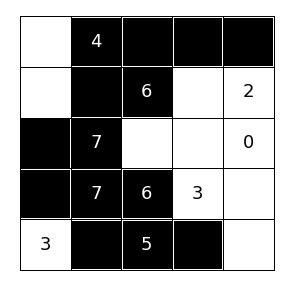

In [36]:
imMosaic(given5, explanation5.solve())

Démineur

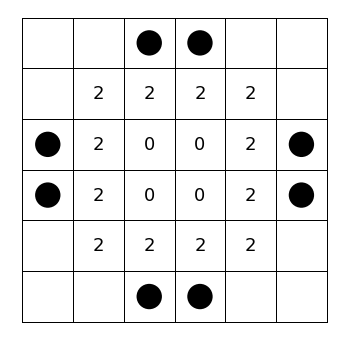

In [20]:
imMosaic(givenD6, explanationD6.solve(), True)

### Enregistrement sur disque des images des explications

In [21]:
def imsExplanations(given, explanation):

    minesweeper = explanation.facts != []

    nrow = len(given)
    ncol = len(given[0])
    
    ESNlist = explanation.explanations

    grid = init_grid(given)

    if minesweeper:
            for i in range(nrow):
                for j in range(ncol):
                    if given[i,j] >= 0:
                        grid[i,j] = 0

    l = [imMosaic(given, grid, minesweeper=minesweeper)]

    for hint in ESNlist:

        l.append(imMosaic(given, grid, minesweeper=minesweeper, hint = hint))
        for n in hint[2]:
            (i, j), v = extractHint([n])
            grid[i,j] = v

    l.append(imMosaic(given, grid, minesweeper=minesweeper))

    return l

#! mkdir images
def writeExplanations(ims, prefix):
    for i, im in enumerate(ims):
        im.save(f'{global_prefix}images/{prefix}-{i}.png', format = 'png')

def displayExplanations(prefix):
    display_images = displayImages.mpl if IN_COLAB else displayImages.cv # ou widgets
    return display_images(f'{global_prefix}images/{prefix}-')

## Exemples de mosaïques

#### Exemple 1

In [26]:
ims5 = imsExplanations(given5, explanation5)
writeExplanations(ims5, 'given5')

In [26]:
displayExplanations('given5')

#### Exemple 2


In [ ]:
# 1 mn
explainFull(given7, explanation7)
ims7 = imsExplanations(given7, explanation7)
writeExplanations(ims7, 'given7')

In [28]:
displayExplanations('given7')

#### Exemple 3

In [29]:
# 8 mns
explainFull(given10, explanation10)
ims10 = imsExplanations(given10, explanation10)
writeExplanations(ims10, 'given10')

In [30]:
displayExplanations('given10')

#### Exemple 4

In [28]:
# 51 mns
explainFull(given15, explanation15)
ims15 = imsExplanations(given15, explanation15)
writeExplanations(ims15, 'given15')


Facts (E)

Constraints (S)
   sum([pixels[0,1], pixels[0,2], pixels[0,3], pixels[1,1], pixels[1,2], pixels[1,3], pixels[2,1], pixels[2,2], pixels[2,3]]) == 0

=> Hint (N)
   pixels[0,1] == 0
   pixels[0,2] == 0
   pixels[0,3] == 0
   pixels[1,1] == 0
   pixels[1,2] == 0
   pixels[1,3] == 0
   pixels[2,1] == 0
   pixels[2,2] == 0
   pixels[2,3] == 0

RESTE 216

Facts (E)
   pixels[1,1] == 0
   pixels[0,1] == 0
   pixels[1,2] == 0
   pixels[0,2] == 0

Constraints (S)
   sum([pixels[0,0], pixels[0,1], pixels[0,2], pixels[1,0], pixels[1,1], pixels[1,2]]) == 2

=> Hint (N)
   pixels[0,0] == 1
   pixels[1,0] == 1

RESTE 214

Facts (E)

Constraints (S)
   sum([pixels[2,0], pixels[2,1], pixels[3,0], pixels[3,1], pixels[4,0], pixels[4,1]]) == 2
   sum([pixels[3,0], pixels[3,1], pixels[4,0], pixels[4,1], pixels[5,0], pixels[5,1]]) == 4

=> Hint (N)
   pixels[2,0] == 0
   pixels[5,0] == 1
   pixels[5,1] == 1

RESTE 211

Facts (E)

Constraints (S)
   sum([pixels[11,2], pixels[11,3], pixels[11,4],

In [17]:
displayExplanations('given15')

#### Exemple 5

In [10]:
# 2h 45 mns
explainFull(given20, explanation20)
ims20 = imsExplanations(given20, explanation20)
writeExplanations(ims20, 'given20')


Facts (E)

Constraints (S)
   sum([pixels[18,18], pixels[18,19], pixels[19,18], pixels[19,19]]) == 4

=> Hint (N)
   pixels[18,18] == 1
   pixels[18,19] == 1
   pixels[19,18] == 1
   pixels[19,19] == 1

RESTE 396

Facts (E)

Constraints (S)
   sum([pixels[18,3], pixels[18,4], pixels[18,5], pixels[19,3], pixels[19,4], pixels[19,5]]) == 0

=> Hint (N)
   pixels[18,3] == 0
   pixels[18,4] == 0
   pixels[18,5] == 0
   pixels[19,3] == 0
   pixels[19,4] == 0
   pixels[19,5] == 0

RESTE 390

Facts (E)

Constraints (S)
   sum([pixels[13,6], pixels[13,7], pixels[13,8], pixels[14,6], pixels[14,7], pixels[14,8], pixels[15,6], pixels[15,7], pixels[15,8]]) == 9

=> Hint (N)
   pixels[13,6] == 1
   pixels[13,7] == 1
   pixels[13,8] == 1
   pixels[14,6] == 1
   pixels[14,7] == 1
   pixels[14,8] == 1
   pixels[15,6] == 1
   pixels[15,7] == 1
   pixels[15,8] == 1

RESTE 381

Facts (E)

Constraints (S)
   sum([pixels[11,2], pixels[11,3], pixels[11,4], pixels[12,2], pixels[12,3], pixels[12,4], pixels[13

In [42]:
displayExplanations('given20')

## Exemples de démineurs

##### Exemple 1

In [ ]:
explainFull(givenD6, explanationD6)
imsD6 = imsExplanations(givenD6, explanationD6)
writeExplanations(imsD6, 'givenD6')

In [32]:
displayExplanations('givenD6')

##### Exemple 2

In [ ]:
explainFull(givenD8, explanationD8)
imsD8 = imsExplanations(givenD8, explanationD8)
writeExplanations(imsD8, 'givenD8')

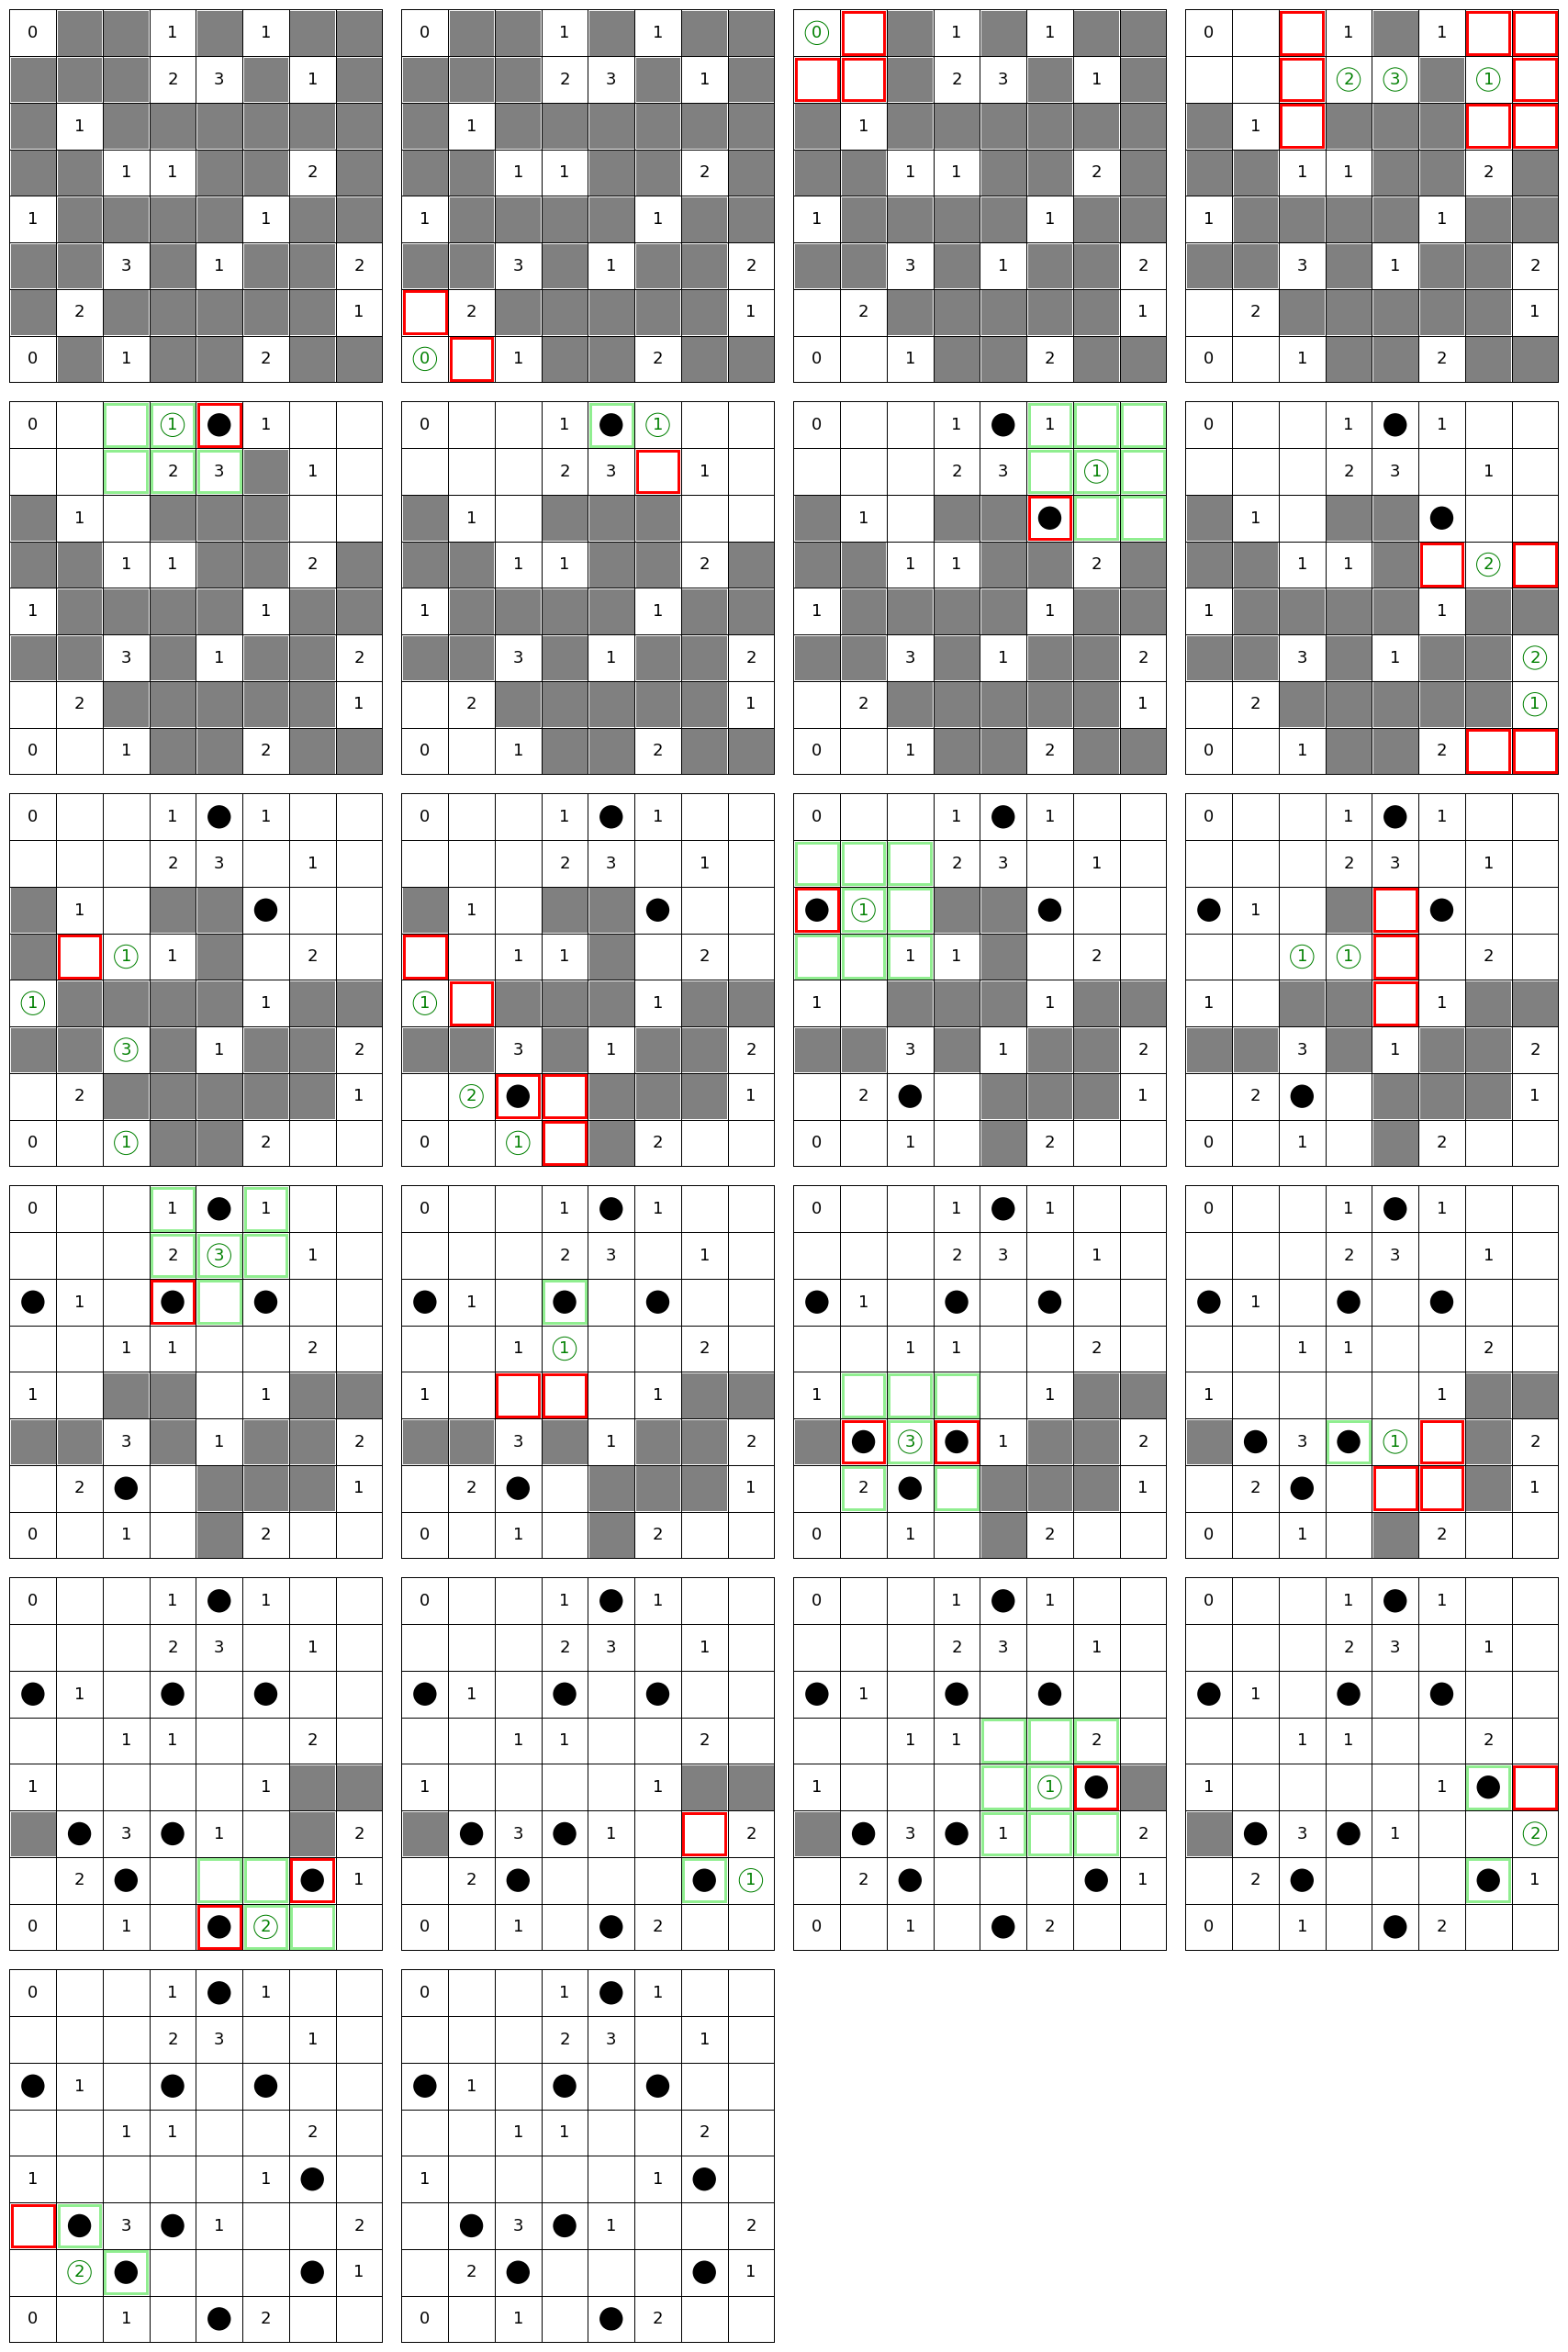

In [33]:

displayImages.concat(imsD8, nbColonnes=4)

In [34]:
displayExplanations('givenD8')

##### Exemple 3

In [35]:
explainFull(givenD9, explanationD9)
imsD9 = imsExplanations(givenD9, explanationD9)
writeExplanations(imsD9, 'givenD9')

In [36]:
displayExplanations('givenD9')

##### Exemple 4

In [37]:
explainFull(givenD10, explanationD10)
imsD10 = imsExplanations(givenD10, explanationD10)
writeExplanations(imsD10, 'givenD10')

In [41]:
displayExplanations('givenD10')

##### Exemple 5

In [43]:
# 3 heures
explainFull(givenD15, explanationD15)
imsD15 = imsExplanations(givenD15, explanationD15)
writeExplanations(imsD15, 'givenD15')

True

Facts (E)
   pixels[11,1] == 0
   pixels[13,2] == 0
   pixels[12,1] == 0
   pixels[13,3] == 0
   pixels[11,3] == 0
   pixels[12,2] == 0

Constraints (S)
   sum([pixels[11,1], pixels[11,2], pixels[11,3], pixels[12,1], pixels[12,2], pixels[12,3], pixels[13,1], pixels[13,2], pixels[13,3]]) == 3

=> Hint (N)
   pixels[11,2] == 1
   pixels[12,3] == 1
   pixels[13,1] == 1

RESTE 123

Facts (E)
   pixels[13,1] == 1

Constraints (S)
   sum([pixels[13,0], pixels[13,1], pixels[14,0], pixels[14,1]]) == 1

=> Hint (N)
   pixels[13,0] == 0
   pixels[14,1] == 0

RESTE 121

Facts (E)

Constraints (S)
   sum([pixels[10,3], pixels[10,4], pixels[10,5], pixels[11,3], pixels[11,4], pixels[11,5], pixels[12,3], pixels[12,4], pixels[12,5]]) == 4
   sum([pixels[10,2], pixels[10,3], pixels[10,4], pixels[11,2], pixels[11,3], pixels[11,4], pixels[12,2], pixels[12,3], pixels[12,4]]) == 3

=> Hint (N)
   pixels[10,2] == 0
   pixels[10,5] == 1
   pixels[12,5] == 1

RESTE 118

Facts (E)

Constraints (S)
   sum

In [ ]:
displayExplanations('givenD15')